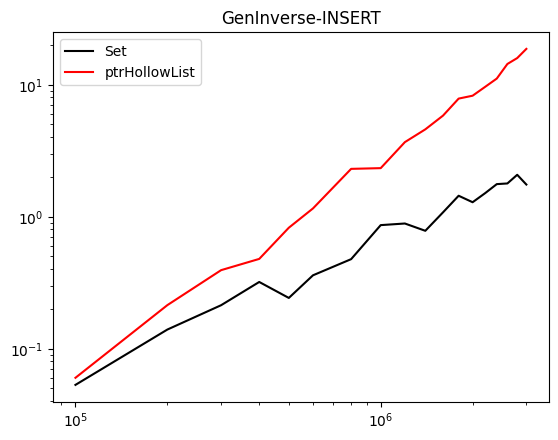

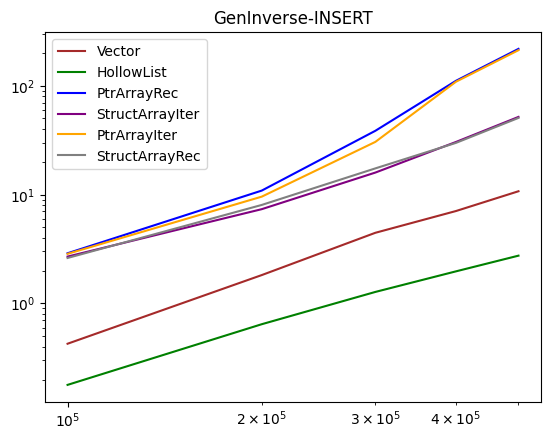

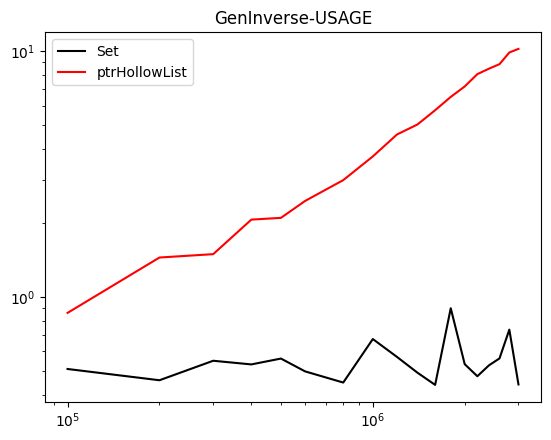

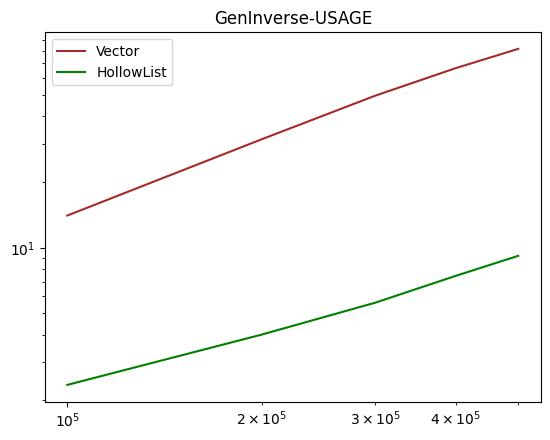

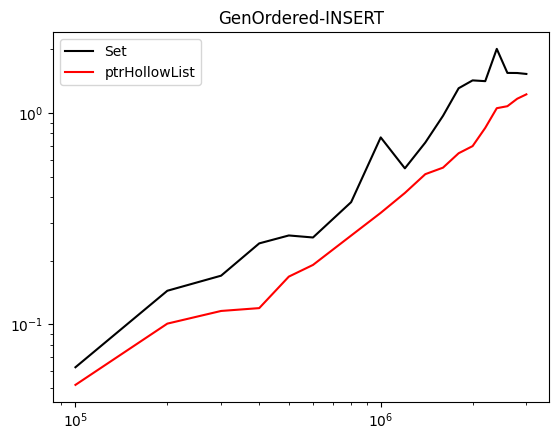

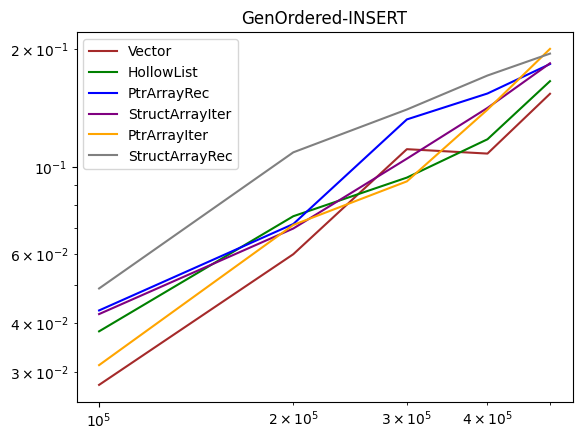

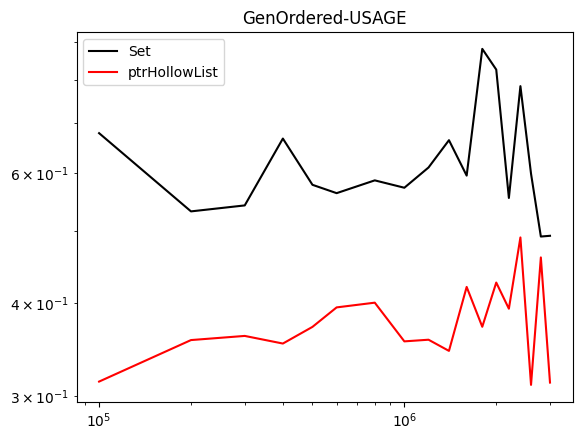

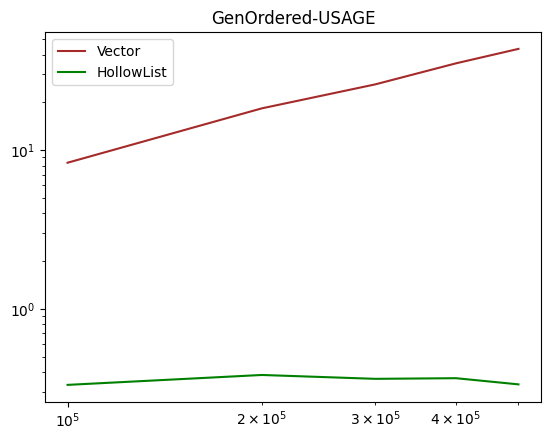

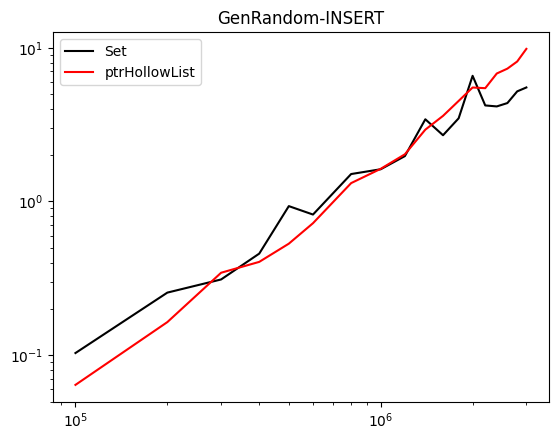

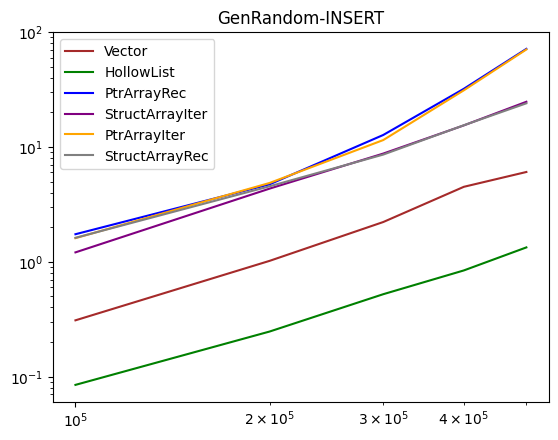

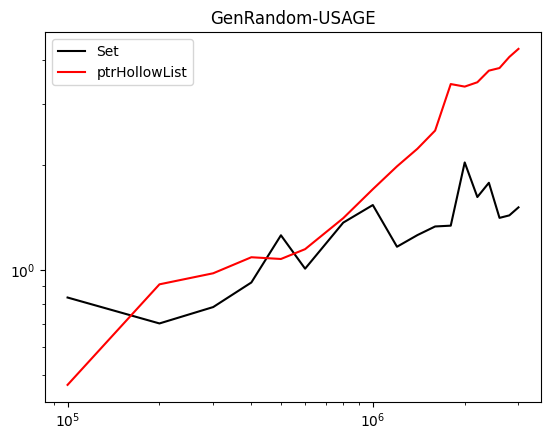

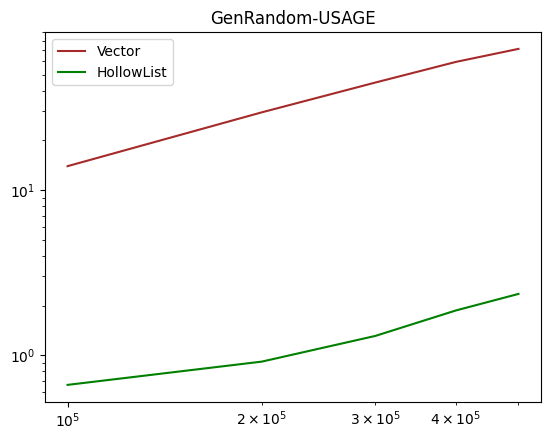

In [6]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colores = {"ptrHollowList": "red", "HollowList": "green", "PtrArrayRec": "blue", 
           "StructArrayIter": "purple", "PtrArrayIter": "orange", "StructArrayRec": "gray",
            "Vector": "brown", "Set": "black"}
contenido = os.listdir('./CSV/')
for archivo in contenido:
    if archivo.endswith(".csv"):
        df = pd.read_csv('./CSV/'+archivo)
        for test in df.TEST.unique():
            test_df=df[df.TEST==test]
            for type in test_df.TYPE.unique():
                fig, ax = plt.subplots()
                type_df = test_df[test_df.TYPE == type]
                for program in type_df.PROGRAM.unique():
                    program_df = type_df[type_df.PROGRAM == program]
                    sizes = program_df.SIZE.values
                    times = program_df.TIME.values
                    ax.plot(sizes, times, label=program, color=colores[program])
                ax.legend()
                ax.set_title(f"{Path(archivo).stem}-{test}")
                #plt.xscale('log')
                #plt.yscale('log')
                filename = "figure_{}-{}.svg".format(Path(archivo).stem, type)
                plt.savefig(filename, format="svg")
    